# Project - Supervised Learning
# PART I

In [591]:
# used to supress display of warnings
import warnings

# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Import and warehouse data

In [592]:
# Importing Data file
df1 = pd.read_csv('Normal.csv')
df2 = pd.read_csv('Type_H.csv')
df3 = pd.read_csv('Type_S.csv')

print(df1.shape)
print(df1.size)
print(df2.shape)
print(df2.size)
print(df3.shape)
print(df3.size)

(100, 7)
700
(60, 7)
420
(150, 7)
1050


In [593]:
df1.info()
df2.info()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null

In [594]:
print(df1.describe())
print("")
print(df2.describe())
print("")
print(df3.describe())

       P_incidence      P_tilt     L_angle     S_slope    P_radius    S_Degree
count   100.000000  100.000000  100.000000  100.000000  100.000000  100.000000
mean     51.685244   12.821414   43.542605   38.863830  123.890834    2.186572
std      12.368161    6.778503   12.361388    9.624004    9.014246    6.307483
min      30.741938   -5.845994   19.071075   17.386972  100.501192  -11.058179
25%      42.817849    8.799951   35.000000   32.340487  118.182659   -1.511360
50%      50.123115   13.482435   42.638923   37.059694  123.874328    1.152710
75%      61.470097   16.785953   51.602346   44.608788  129.040401    4.968807
max      89.834676   29.894119   90.563461   67.195460  147.894637   31.172767

       P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree
count    60.000000  60.000000  60.000000  60.000000   60.000000  60.000000
mean     47.638407  17.398795  35.463524  30.239612  116.474968   2.480251
std      10.697131   7.016708   9.767795   7.555388    9.355720

In [595]:
print(df1.head())
print("")
print(df2.head())
print("")
print(df3.head())

   P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal

   P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    63.027818  22.552586  39.609117  40.475232   98.672917  -0.254400  Type_H
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259  Type_H
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317  Type_H
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523  Type_H
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501  Type_H

   P_incidence     P_tilt    L_angle    S_slope    P_rad

In [596]:
df4 = pd.merge(df1, df2, how='outer')

In [597]:
df4.shape
print(df4.describe())
print("")
print(df1.describe())

       P_incidence      P_tilt     L_angle     S_slope    P_radius    S_Degree
count   160.000000  160.000000  160.000000  160.000000  160.000000  160.000000
mean     50.167680   14.537932   40.512949   35.629748  121.109885    2.296702
std      11.898309    7.198617   12.080560    9.818035    9.800193    6.012003
min      26.147921   -5.845994   14.000000   13.366931   84.241415  -11.058179
25%      41.709201    9.920628   32.353989   29.225645  115.553188   -1.301069
50%      48.567273   14.176111   38.500000   34.694676  121.040944    1.717861
75%      56.189587   19.283796   47.547636   41.894534  127.263106    5.612368
max      89.834676   41.557331   90.563461   67.195460  147.894637   31.172767

       P_incidence      P_tilt     L_angle     S_slope    P_radius    S_Degree
count   100.000000  100.000000  100.000000  100.000000  100.000000  100.000000
mean     51.685244   12.821414   43.542605   38.863830  123.890834    2.186572
std      12.368161    6.778503   12.361388    9.624

In [598]:
df = pd.merge(df3, df4, how='outer')

In [599]:
print(df.shape)

(310, 7)


In [600]:
print(df.size)

2170


In [601]:
df4 = pd.merge(df1, df2, how='outer')

In [602]:
df = pd.merge(df4, df3, how='outer')

In [603]:
df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [604]:
df4.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [605]:
print(df4.shape)
print(df.shape)

(160, 7)
(310, 7)


In [610]:
df1.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [612]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


## 2. Data cleansing:

In [613]:
# getting total number of rows and column in the dataframe
print(f" Shape of the dataframe = {df.shape}")
totalrows=df.shape[0]
print(f" Total number of rows in the dataset =  {totalrows}")

 Shape of the dataframe = (310, 7)
 Total number of rows in the dataset =  310


In [614]:
# Checking Null colunms
file_nullcols = df.isnull().sum()
file_nullcols

# No null values are found

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

#### There are no missing values in the data.

In [615]:
# Checking data type of each colunm to check if any type needs to be changed
df.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [616]:
# Checking basic details of the data
df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


## 3. EDA - Data analysis & visualisation:

In [617]:
df.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [618]:
df.corr()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


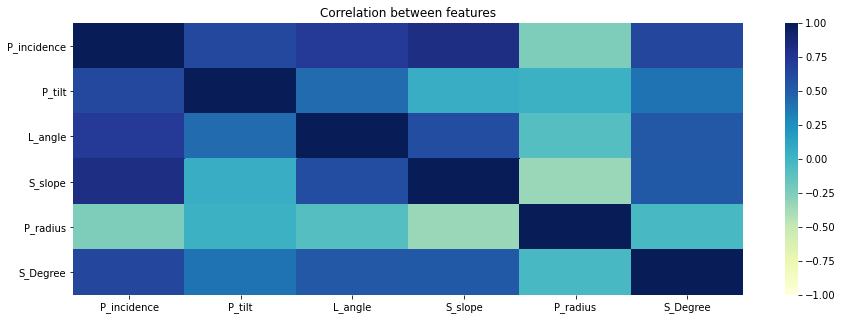

In [619]:
# To get a correlation matrix 
# Ploting correlation plot
corr = df.corr() 
plt.figure(figsize=(15, 5))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart

sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0)

# specify name of the plot
plt.title('Correlation between features')
plt.show()

In [620]:
df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


## 3.1. Univariate Analysis

C:\Users\enaysep\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\enaysep\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\enaysep\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

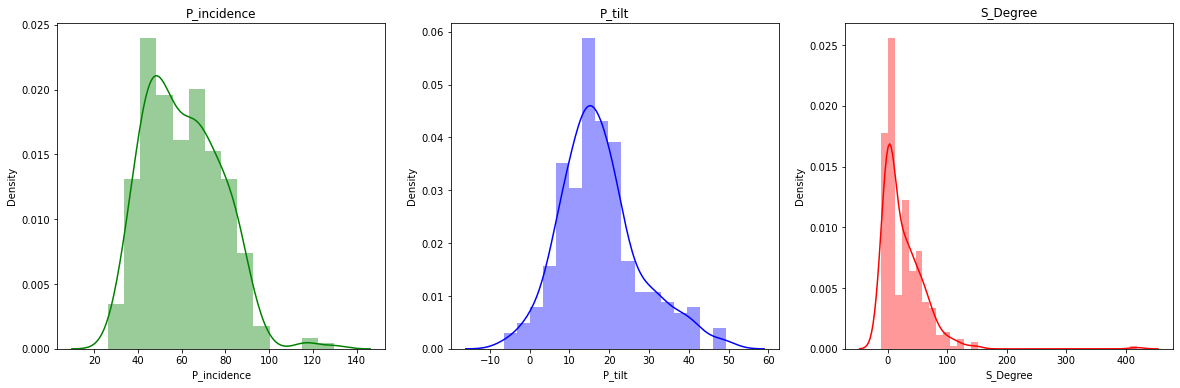

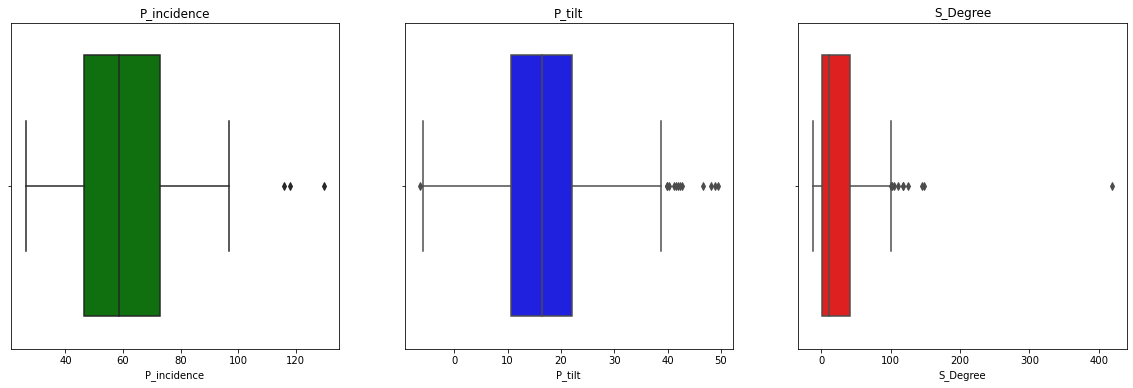

In [621]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('P_incidence')
sns.distplot(df['P_incidence'],color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('P_tilt')
sns.distplot(df['P_tilt'],color='blue')

# subplot 3l
plt.subplot(1, 3, 3)
plt.title('S_Degree')
sns.distplot(df['S_Degree'],color='red')

plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('P_incidence')
sns.boxplot(df['P_incidence'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('P_tilt')
sns.boxplot(df['P_tilt'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('S_Degree')
sns.boxplot(df['S_Degree'],orient='vertical',color='red')

plt.show()

C:\Users\enaysep\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\enaysep\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\enaysep\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

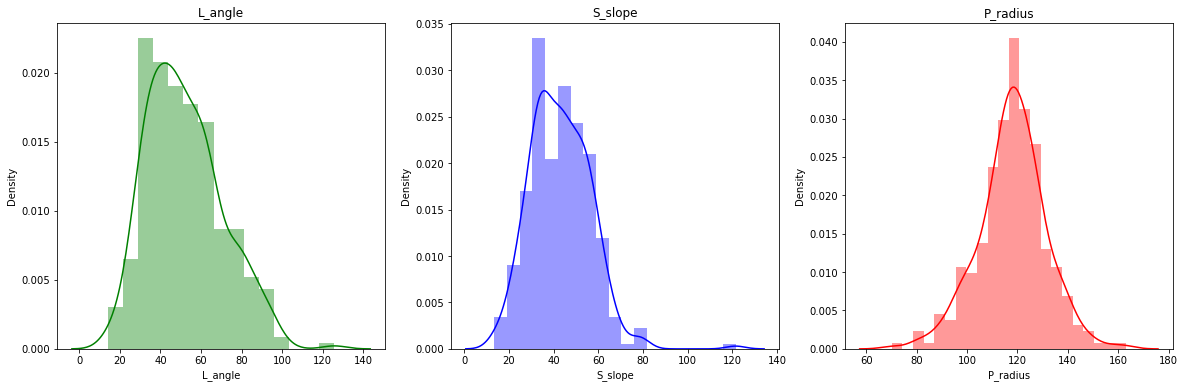

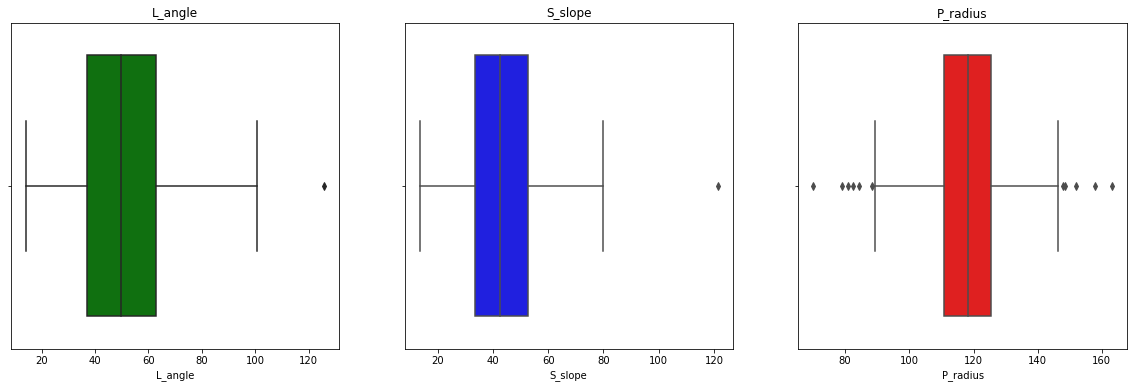

In [622]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('L_angle')
sns.distplot(df['L_angle'],color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('S_slope')
sns.distplot(df['S_slope'],color='blue')

# subplot 3l
plt.subplot(1, 3, 3)
plt.title('P_radius')
sns.distplot(df['P_radius'],color='red')

plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('L_angle')
sns.boxplot(df['L_angle'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('S_slope')
sns.boxplot(df['S_slope'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('P_radius')
sns.boxplot(df['P_radius'],orient='vertical',color='red')

plt.show()

In [623]:
#Check for null values
df.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [625]:
df["Class"].value_counts(normalize=True)

Type_S    0.429032
Normal    0.235484
Type_H    0.119355
Nrmal     0.087097
type_h    0.074194
tp_s      0.054839
Name: Class, dtype: float64

In [626]:
df5=df.replace({'Class':{'type_h':'Type_H','Nrmal':'Normal','tp_s':'Type_S'}})

In [627]:
df5.head(310)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


<AxesSubplot:>

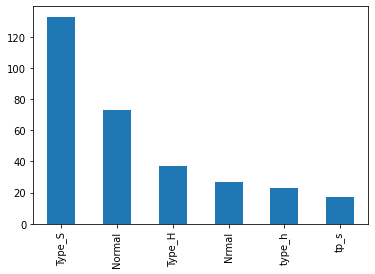

In [628]:
pd.value_counts(df["Class"]).plot(kind="bar")

In [629]:
df5["Class"].value_counts(normalize=True)

Type_S    0.483871
Normal    0.322581
Type_H    0.193548
Name: Class, dtype: float64

<AxesSubplot:>

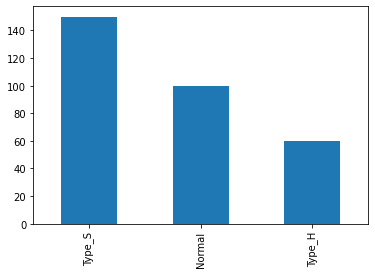

In [630]:
pd.value_counts(df5["Class"]).plot(kind="bar")

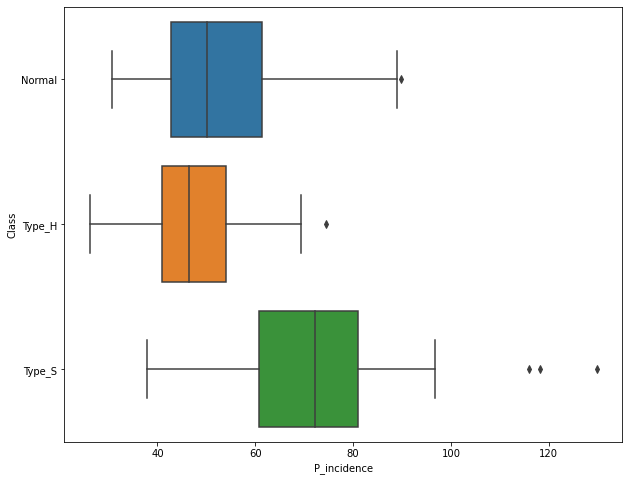

In [631]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(y="Class", x="P_incidence", data=df5)

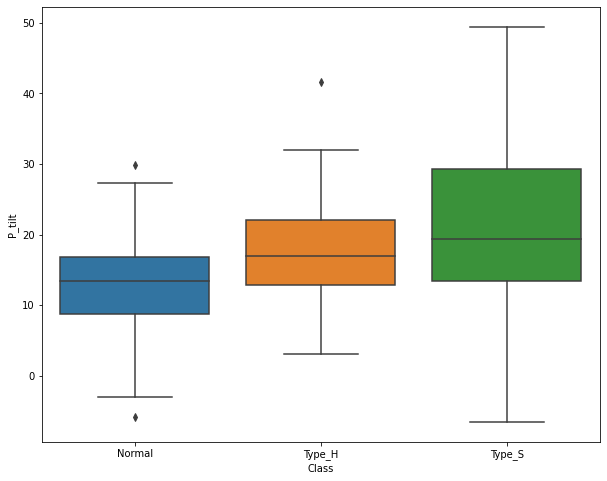

In [632]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(y="P_tilt", x="Class", data=df5)

## 3.2. Bivariate Analysis

In [633]:
rs = np.random.RandomState(0)
file = pd.DataFrame(rs.rand(10, 10))
corr = df5.corr()
corr.style.background_gradient(cmap='coolwarm')

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


#### P_incidence is most corelated to S_slope and L_angle

<AxesSubplot:xlabel='L_angle', ylabel='P_tilt'>

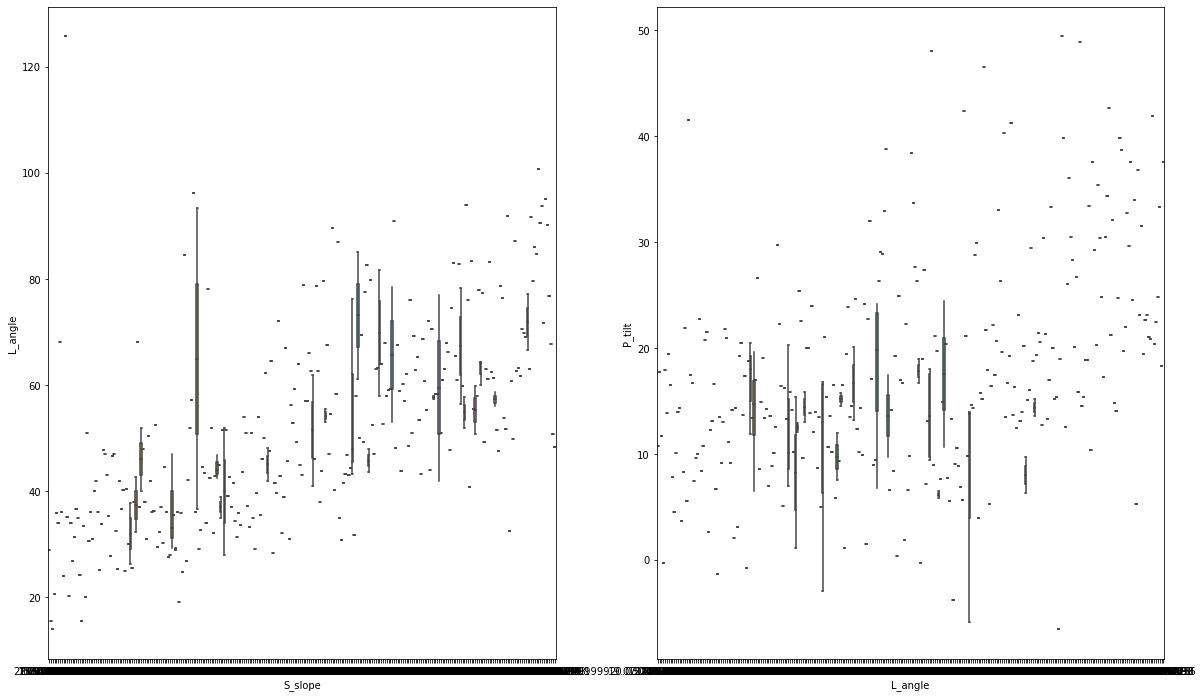

In [634]:
plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.boxplot(x = 'S_slope', y = 'L_angle', data = df5)
plt.subplot(1,2,2)
sns.boxplot(x = 'L_angle', y = 'P_tilt', data = df5)

## 3.3. Multivariate Regression and Scatter Plot

## Scatter Plot

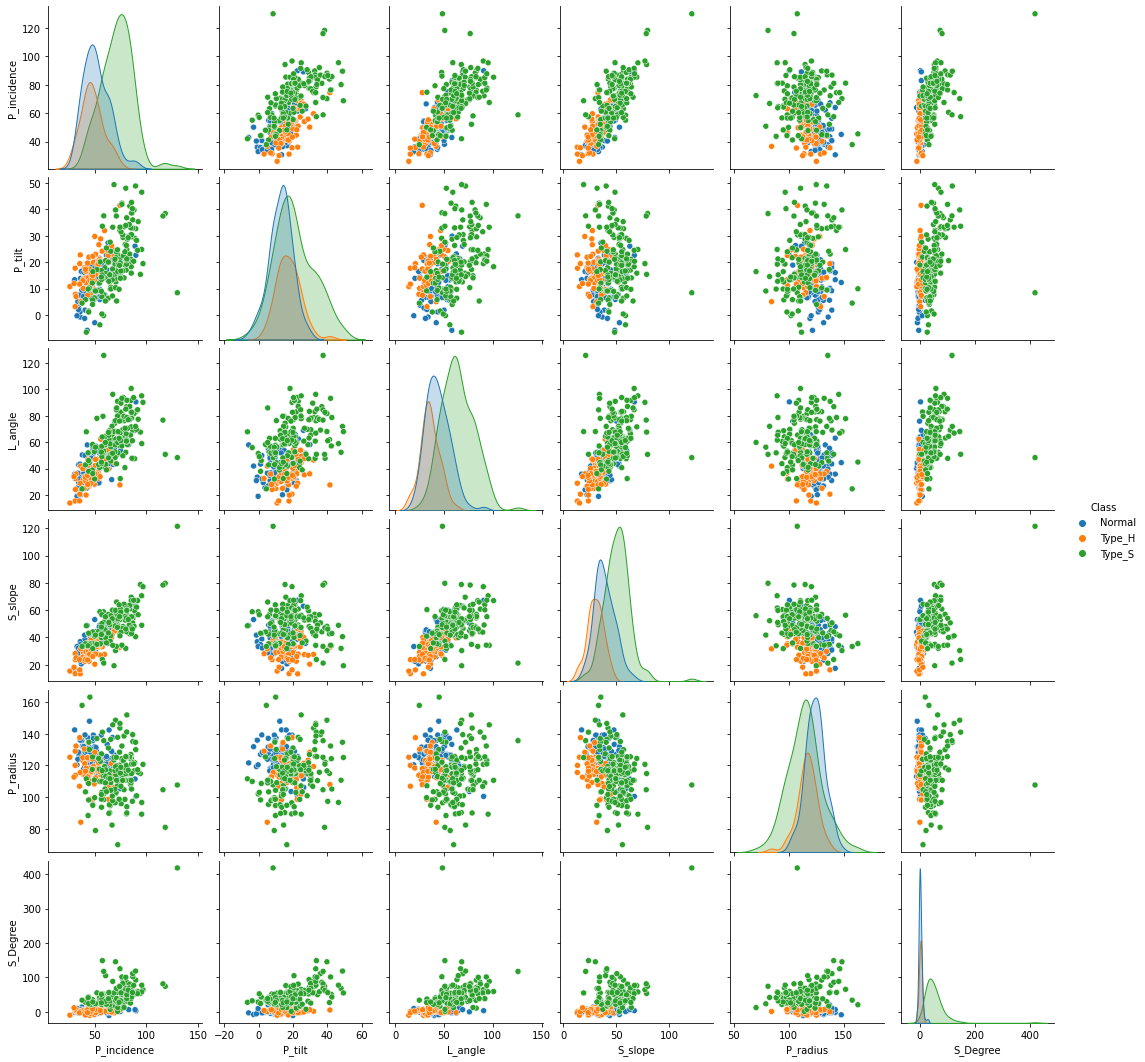

In [635]:
sns.pairplot(df5, diag_kind = "kde", hue = "Class")

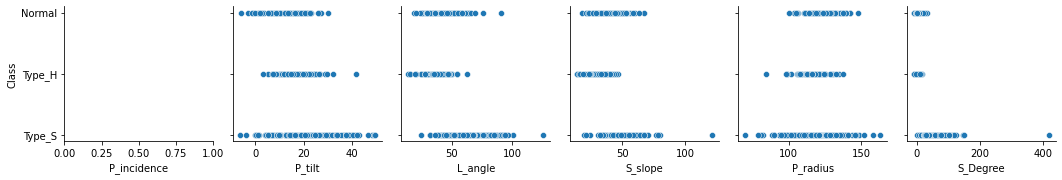

In [636]:
sns.pairplot(df5, y_vars='Class', x_vars=["P_incidence", "P_tilt",'L_angle', 'S_slope','P_radius','S_Degree'])
plt.show()

In [637]:
# Log Transformation of independent variables
D1 = np.log(df5['P_incidence'])
D2 = np.log(df5['P_tilt'])
D3 = np.log(df5['L_angle'])
D4 = np.log(df5['S_slope'])
D5 = np.log(df5['P_radius'])
D6 = np.log(df5['S_Degree'])

C:\Users\enaysep\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


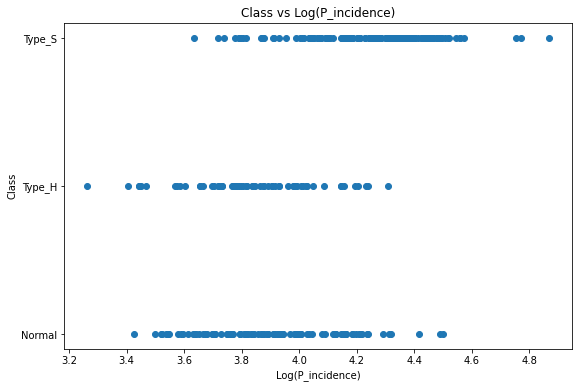

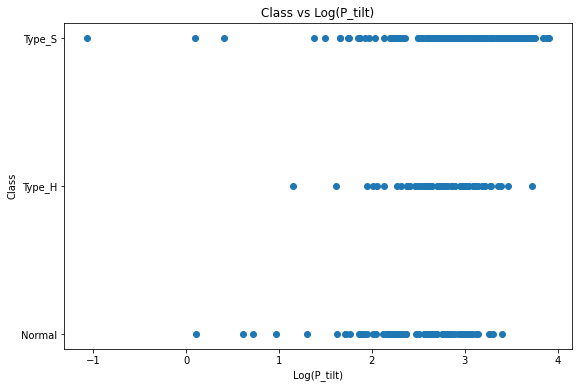

In [638]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.title('Class vs Log(P_incidence)')
plt.scatter( D1, df5['Class'])
plt.xlabel('Log(P_incidence)')
plt.ylabel('Class')


plt.figure(figsize=(20,6))
plt.subplot(1, 2, 2)
plt.title('Class vs Log(P_tilt)')
plt.scatter( D2, df5['Class'])
plt.xlabel('Log(P_tilt)')
plt.ylabel('Class')


plt.show()

# 4. Data pre-processing:

In [639]:
## replaced the Class values to Type_S, Normal and Type_H to normalise it

In [640]:
df5.head()
df5.tail()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S
309,48.259920,16.417462,36.329137,31.842457,94.882336,28.343799,Type_S


In [641]:
df5.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [642]:
df5.groupby(df5.Class).mean()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
Class,,,,,,
Normal,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572
Type_H,47.638407,17.398795,35.463524,30.239612,116.474968,2.480251
Type_S,71.514224,20.748038,64.110108,50.766186,114.518810,51.896687


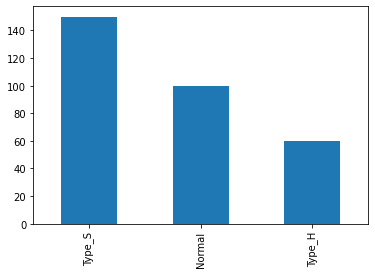

In [643]:
df5.Class.value_counts().plot(kind = 'bar')
plt.show()
##Distribution of target variables

C:\Users\enaysep\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='S_Degree'>

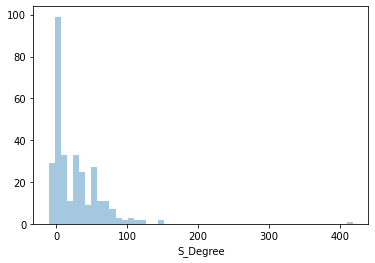

In [644]:
#to plot histograms
sns.distplot(df5['S_Degree'],kde=False,bins=50)

<AxesSubplot:xlabel='P_incidence'>

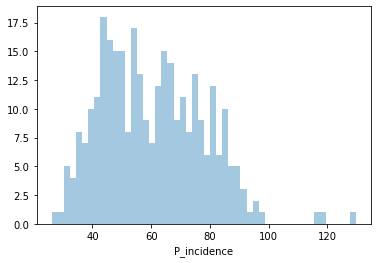

In [645]:
sns.distplot(df5['P_incidence'],kde=False,bins=50)

<AxesSubplot:xlabel='P_radius'>

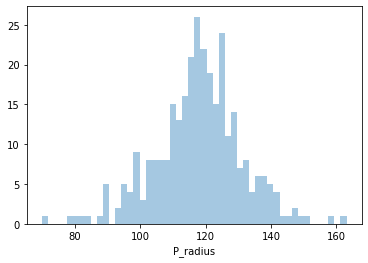

In [646]:
sns.distplot(df5['P_radius'],kde=False,bins=50)

<AxesSubplot:xlabel='P_tilt', ylabel='Density'>

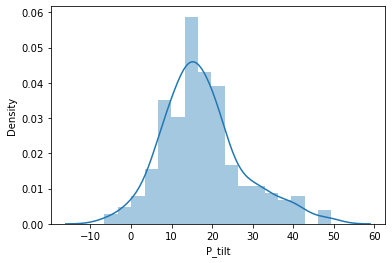

In [647]:
sns.distplot(df5['P_tilt'])

In [648]:
df5.corr()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


<AxesSubplot:xlabel='Class', ylabel='P_incidence'>

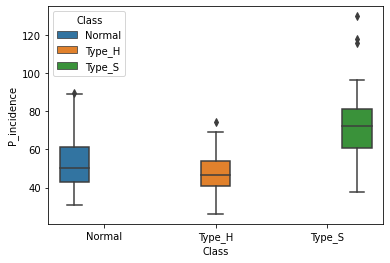

In [649]:
sns.boxplot(x="Class",y="P_incidence",data=df5,hue="Class")
#this shows that sinle ppl & Male are the worst

### Outlier Analysis

#### As we have seen in our EDA we have very less outliers which needs to be handled

#### We are imputing outiers with mean

In [650]:
for c in col:
    #getting upper lower quartile values
    q25,q75=np.percentile(df5[c],25),np.percentile(df5[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in df5[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')
    #taking mean of a column without considering outliers
    df_include = df5.loc[(df5[c] >= lower) & (df5[c] <= upper)]
    mean=int(df_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    print('\n')
    #imputing outliers with mean
    df5[c]=np.where(df5[c]>upper,mean,df5[c])
    df5[c]=np.where(df5[c]<lower,mean,df5[c])
    Outliers=[i for i in df5[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
    print('\n')

KeyError: 'HighestSpend'

### Encoding Target Variable

In [654]:
#Use label encoder to convert categorical variables to one-hot encoding (dummy variables)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df5['Class']=le.fit_transform(df5['Class'])
df5['Class'].value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

#### Normal: 0

#### Type_H: 1

#### Type_S: 2

In [653]:
df5['Class']=df5['Class'].astype('category') #changing datatype to category.

### Checking on Target Imbalance

C:\Users\enaysep\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


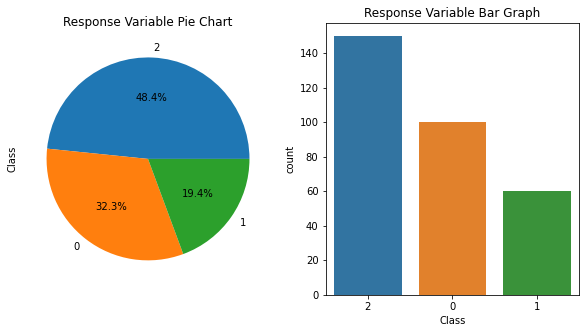

In [656]:
f,axes=plt.subplots(1,2,figsize=(10,5))
df5['Class'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('Class',data=df5,ax=axes[1],order=[2,0,1])
axes[0].set_title('Response Variable Pie Chart')
axes[1].set_title('Response Variable Bar Graph')
plt.show()

#### We have imbalanced target variable

#### Every class is not equally distributed.

#### 48% of data is occupied by Type_S

#### When you have imbalance dataset model does not learn about less distributed classes. This gives poor performance in unseen data

In [315]:
df5.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [674]:
#standardization of data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [675]:
X_std = pd.DataFrame(StandardScaler().fit_transform(df5))
X_std.columns = df5.columns

### Train - Test Split

In [676]:
# Arrange data into independent variables and dependent variables
X=df.drop(columns='Class')
y=df['Class'] #target

In [677]:
#split the dataset into training and test datasets
import numpy as np
from sklearn.model_selection import train_test_split

# Transform data into features and target
X = np.array(df5.iloc[:, 1:5]) 
y = np.array(df5['Class'])

# Arrange data into independent variables and dependent variables
#X=df5.drop(columns='Class')
#y=df5['Class'] #target

In [678]:
df5.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,1.161290
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.884852
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,1.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,2.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,2.000000


In [691]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [692]:
# checking the dimensions of the train & test subset
# to print dimension of train set
print(X_train.shape)
# to print dimension of test set
print(X_test.shape)

(217, 4)
(93, 4)


In [693]:
print(X_train.shape)
print(y_train.shape)

(217, 4)
(217,)


In [694]:
print(X_test.shape)
print(y_test.shape)

(93, 4)
(93,)


## 5. Model training, testing and tuning:

### KNN Classifier

In [697]:
KNN = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean' ) #Building knn with 5 neighbors

In [698]:
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)

In [699]:
# Classification Accuracy
print('Accuracy on Training data:',KNN.score(X_train, y_train) )
print('Accuracy on Test data:',KNN.score(X_test, y_test) )

Accuracy on Training data: 0.8294930875576036
Accuracy on Test data: 0.7204301075268817


#### Training Acuracy is 0.82 and Testing Accuracy is 0.72. Performance is less in test data.
#### This is due to overfitting of data

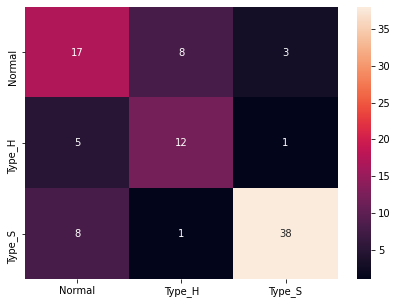

In [700]:
cm = confusion_matrix(y_test, predicted_labels, labels=[0, 1,2])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","Type_H","Type_S"]],
                  columns = [i for i in ["Normal","Type_H","Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

### Classification Report

In [701]:
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.57      0.61      0.59        28
           1       0.57      0.67      0.62        18
           2       0.90      0.81      0.85        47

    accuracy                           0.72        93
   macro avg       0.68      0.69      0.69        93
weighted avg       0.74      0.72      0.73        93



#### Finding best K value

In [702]:
train_score=[]
test_score=[]
for k in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean' ) 
    KNN.fit(X_train, y_train)
    train_score.append(KNN.score(X_train, y_train))
    test_score.append(KNN.score(X_test, y_test))

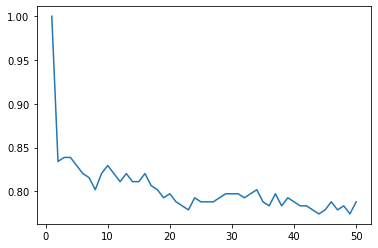

In [703]:
plt.plot(range(1,51),train_score)
plt.show()

##### Here training accuracy decreases when increase k value

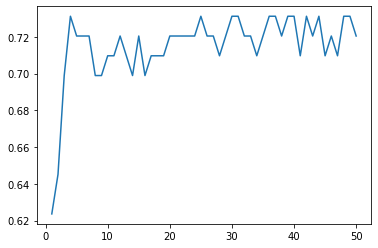

In [704]:
plt.plot(range(1,51),test_score)
plt.show()

#### The maximum accuracy occures when k is less than 5.

#### We will fix k value as less than 5.

In [705]:
k=[1,3,5,7,9,11,13,15,17,19]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' ) #Building knn with 5 neighbors
    KNN.fit(X_train, y_train)
    predicted_labels = KNN.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(X_train, y_train)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.6236559139784946:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.47      0.54      0.50        28
           1       0.50      0.61      0.55        18
           2       0.82      0.68      0.74        47

    accuracy                           0.62        93
   macro avg       0.60      0.61      0.60        93
weighted avg       0.65      0.62      0.63        93

Accuracy on Training data for k 3 is 0.8387096774193549:
Accuracy on Test data for k 3 is 0.6989247311827957:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.55      0.57      0.56        28
           1       0.48      0.67      0.56        18
           2       0.95      0.79      0.86        47

    accuracy                           0.70        93
   macro avg       0.66      0.68      0.66        93
weighted avg       0.74      0.70     

#### For K=5 we have balanced train and test error

In [695]:
#Build the model and train and test on training and test sets respectively using scikit-learn. Print the Accuracy of the model 
#with different values of k=3,5,9.

In [706]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors=9)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.6989247311827957
0.7204301075268817
0.6989247311827957


In [707]:
#Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from the above list using the Mis 
#classification error

In [708]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [709]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 5


In [710]:
#Plot misclassification error vs k (with k value on X-axis) using matplotlib.

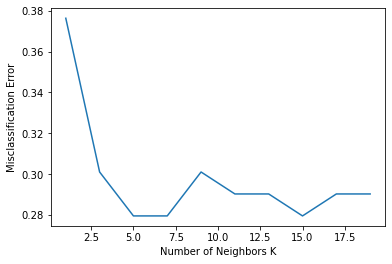

In [711]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [713]:
#Use k=5 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))
#print(recall_score(y_test, y_pred))

0.7204301075268817


### K-Fold CV for finding best model

In [738]:
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=13)
GN_model=GaussianNB()
svc_model_linear = SVC(kernel='linear',C=1,gamma=.6)
svc_model = SVC(kernel='linear',C= .1, gamma= 1)
svc_model_rbf = SVC(kernel='rbf',degree=2,C=.009)
svc_model_poly  = SVC(kernel='poly',degree=2,gamma=0.1,C=.01)

C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

LR: 0.748387 (0.068884)
KNN: 0.741935 (0.055873)
NB: 0.764516 (0.061290)
SVM-linear: 0.748387 (0.077419)
SVM-poly: 0.741935 (0.072131)
SVM-rbf: 0.483871 (0.070674)
SVC: 0.748387 (0.077419)


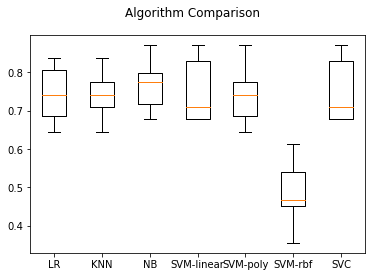

In [740]:
seed = 7
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-linear', svc_model_linear))
models.append(('SVM-poly', svc_model_poly))
models.append(('SVM-rbf', svc_model_rbf))
models.append(('SVC', svc_model))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##### Accuracy is more for NB, KNN,LR and svm-linear. However the standard deviation is less for NB model.
#### We can tell NB be a better algorithm for this dataset because of high accuracy and less Standard deviation
#### NB gives 76% accuracy with little standard deviation.

###### ---------------------------------------------------------------------------------------------------------------------------------------------------

# PART II

In [586]:
# Importing libraries

# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns

## Scikit-learn features various classification, regression and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix


## 1. Import and warehouse data:

In [429]:
# Importing Data file -- Dataset 1
df1 = pd.read_csv('Part2 - Data1.csv')

In [430]:
df1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [431]:
df1.shape

(5000, 8)

In [432]:
# Importing Data file -- Dataset 2
df2 = pd.read_csv('Part2 -Data2.csv')

In [433]:
df2.shape

(5000, 7)

In [434]:
df2.head() #checking first 5 records

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [438]:
# Merging the dataset
df=df1.merge(df2,left_on='ID',right_on='ID') #id is common in both dataframe

# df = pd.merge(df1, df2, how='outer')

In [439]:
df.shape

(5000, 14)

#### Final Dataframe has 14 columns and 5000 rows

In [447]:
df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [445]:
df.tail(20)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
4980,4981,29,5,135,95762,3,5.30,1,0,0,1,1,1,1.0
4981,4982,34,9,195,90266,2,3.00,1,122,0,0,1,0,0.0
4982,4983,36,10,45,95126,4,0.20,1,0,0,0,0,1,0.0
4983,4984,51,26,72,95370,1,2.90,1,0,0,0,0,0,0.0
4984,4985,27,1,98,94043,4,2.30,3,0,0,0,0,1,0.0
4985,4986,48,23,30,94720,3,1.70,2,162,0,0,1,0,0.0
4986,4987,32,6,78,95825,1,2.90,3,0,0,0,0,0,0.0
4987,4988,48,23,43,93943,3,1.70,2,159,0,0,1,0,0.0
4988,4989,34,8,85,95134,1,2.50,1,136,0,0,0,1,0.0
4989,4990,24,0,38,93555,1,1.00,3,0,0,0,1,0,0.0


## 2. Data cleansing:

In [441]:
# Checking the datatypes
df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [448]:
# Changing datatypes of categorical features
col=['HiddenScore','Level','Security','FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']
for i in col:
    df[i]=df[i].astype('category')

In [450]:
df.dtypes
# all categorical columns datatypes are changed

ID                        int64
Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                   int64
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
dtype: object

In [452]:
# Checking the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   5000 non-null   int64   
 1   Age                  5000 non-null   int64   
 2   CustomerSince        5000 non-null   int64   
 3   HighestSpend         5000 non-null   int64   
 4   ZipCode              5000 non-null   int64   
 5   HiddenScore          5000 non-null   category
 6   MonthlyAverageSpend  5000 non-null   float64 
 7   Level                5000 non-null   category
 8   Mortgage             5000 non-null   int64   
 9   Security             5000 non-null   category
 10  FixedDepositAccount  5000 non-null   category
 11  InternetBanking      5000 non-null   category
 12  CreditCard           5000 non-null   category
 13  LoanOnCard           4980 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 347.4 KB


In [453]:
# Checking null values
df.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

#### Target variable LoanOnCard having 20 missing records

In [454]:
# We have very less missing value so we will drop the missing records.
df.dropna(axis=0,inplace=True)

In [455]:
df.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

#### All the missing records are dropped

In [456]:
df.shape

(4980, 14)

In [458]:
df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0
10,11,65,39,105,94710,4,2.4,3,0,0,0,0,0,0.0
11,12,29,5,45,90277,3,0.1,2,0,0,0,1,0,0.0
12,13,48,23,114,93106,2,3.8,3,0,1,0,0,0,0.0
13,14,59,32,40,94920,4,2.5,2,0,0,0,1,0,0.0


In [459]:
# Id column is not useful in model building so dropping that feature
df.drop('ID',axis=1,inplace=True)

In [463]:
df.head()

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0
10,65,39,105,94710,4,2.4,3,0,0,0,0,0,0.0
11,29,5,45,90277,3,0.1,2,0,0,0,1,0,0.0
12,48,23,114,93106,2,3.8,3,0,1,0,0,0,0.0
13,59,32,40,94920,4,2.5,2,0,0,0,1,0,0.0


In [464]:
df.dtypes

Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                   int64
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
dtype: object

## 3. Data analysis & visualisation:

In [467]:
df.describe()

,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
count,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000
mean,45.352610,20.117671,73.85241,93152.420482,1.939536,56.589759
std,11.464212,11.468716,46.07009,2123.660073,1.750006,101.836758
min,23.000000,-3.000000,8.00000,9307.000000,0.000000,0.000000
25%,35.000000,10.000000,39.00000,91911.000000,0.700000,0.000000
50%,45.000000,20.000000,64.00000,93407.000000,1.500000,0.000000
75%,55.000000,30.000000,98.00000,94608.000000,2.525000,101.000000
max,67.000000,43.000000,224.00000,96651.000000,10.000000,635.000000


#### Mean and Median of Age,customer since column is nearly equal,So there wont be any skewness
#### Mean is greater than Median in highestspend and monthly average spend.So Positive skewness will exist
#### We can see high fluctuation in mortage column. 50% of data has zero values but maximum value is 635. This is hugely affected by outliers

## 3.1 Univariate Analysis

#### Distribution and outlier analysis of numerical variables
#### Age

C:\Users\enaysep\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


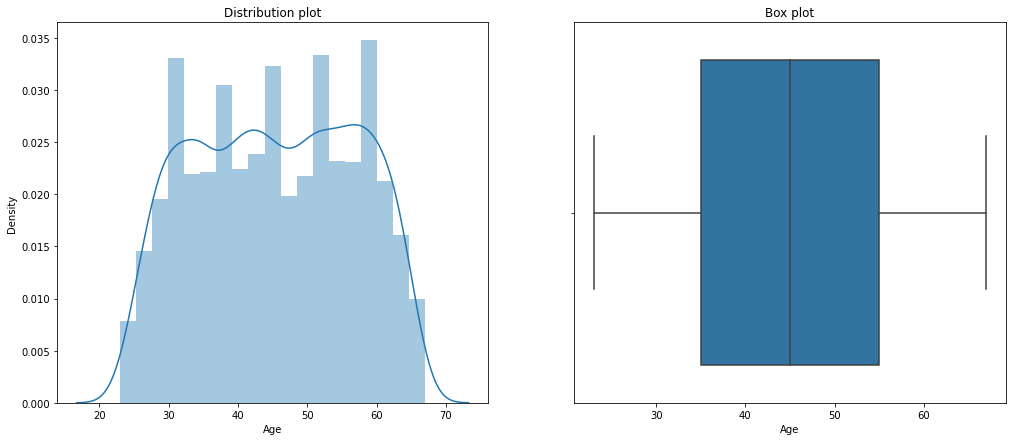

 Total Number of outliers in Age: 0


In [471]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.distplot(df['Age'],  ax=axes[0])
sns.boxplot(x = 'Age', data=df,  orient='h' , ax=axes[1])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

#checking count of outliers.
q25,q75=np.percentile(df['Age'],25),np.percentile(df['Age'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['Age'] if i < lower or i > upper]
print('{} Total Number of outliers in Age: {}'.format('\033[1m',len(Outliers)))

#### There is normality maintained in age column. Center area is little wider.

#### People with age between 35 to 65 are more

#### We have no outliers in this column

#### CustomerSince

C:\Users\enaysep\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


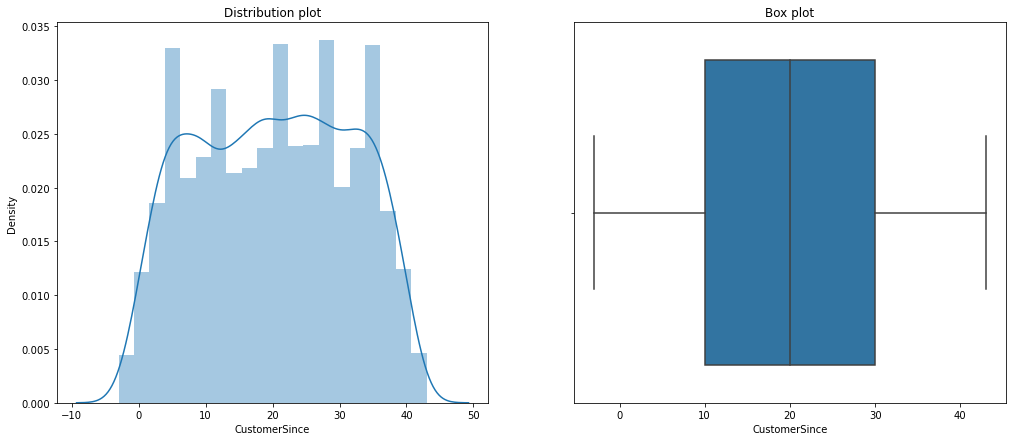

 Total Number of outliers in CustomerSince: 0


In [472]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'CustomerSince', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['CustomerSince'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['CustomerSince'],25),np.percentile(df['CustomerSince'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['CustomerSince'] if i < lower or i > upper]
print('{} Total Number of outliers in CustomerSince: {}'.format('\033[1m',len(Outliers)))

#### Most of the people became customer of bank between 10 to 30. Here the units are masked

#### We have no outliers

#### HighestSpend

C:\Users\enaysep\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


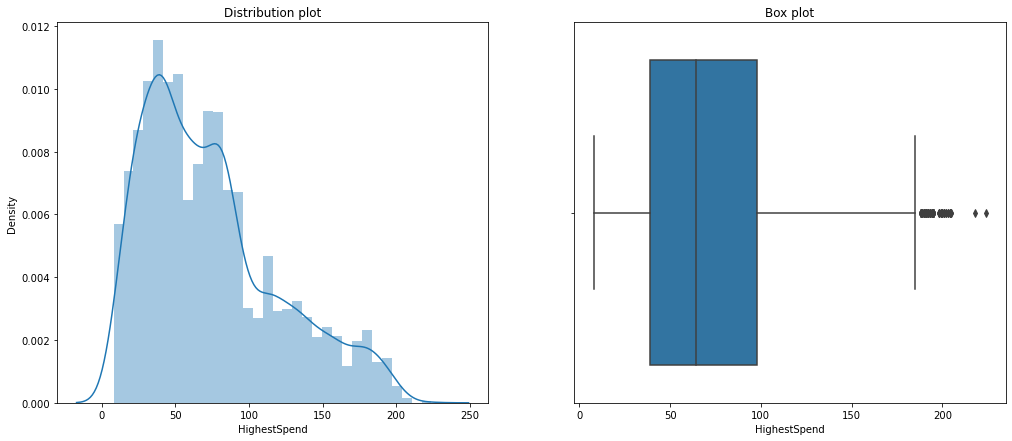

 Total Number of outliers in HighestSpend: 96


In [473]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'HighestSpend', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['HighestSpend'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['HighestSpend'],25),np.percentile(df['HighestSpend'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['HighestSpend'] if i < lower or i > upper]
print('{} Total Number of outliers in HighestSpend: {}'.format('\033[1m',len(Outliers)))

#### We can see positive skewness in the data

#### In one transaction highest spend amount is between 45 to 100. Here the units are masked

#### We can see 96 Outliers. Few customers spent more than 200 as well

#### MonthlyAverageSpend

C:\Users\enaysep\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


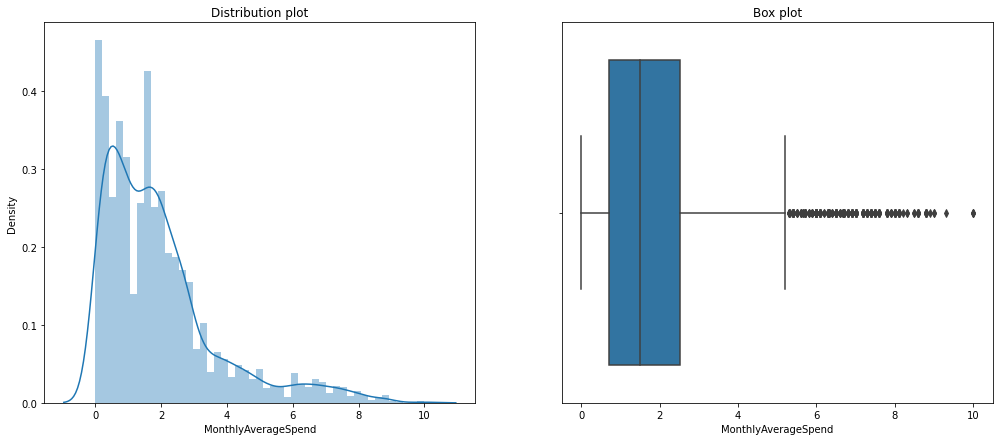

 Total Number of outliers in MonthlyAverageSpend: 324


In [474]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'MonthlyAverageSpend', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['MonthlyAverageSpend'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['MonthlyAverageSpend'],25),np.percentile(df['MonthlyAverageSpend'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['MonthlyAverageSpend'] if i < lower or i > upper]
print('{} Total Number of outliers in MonthlyAverageSpend: {}'.format('\033[1m',len(Outliers)))

#### We can see huge positive skewness in the data

#### Monthly average spend of the customer are mostly between 1 to 3(Units are masked)

#### There is more number of outliers.This tells some customers spent huge amount as well

#### ZipCode

C:\Users\enaysep\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


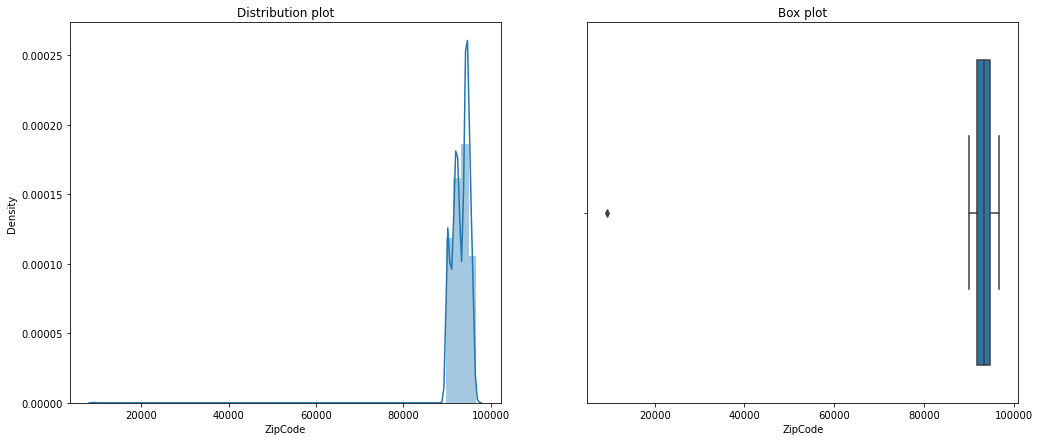

 Total Number of outliers in ZipCode: 1


In [475]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'ZipCode', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['ZipCode'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['ZipCode'],25),np.percentile(df['ZipCode'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['ZipCode'] if i < lower or i > upper]
print('{} Total Number of outliers in ZipCode: {}'.format('\033[1m',len(Outliers)))

#### Most of the zipcodes are appeared once.

#### There is no proper distribution

#### This column does not add value to the model. We will drop during model building

#### Mortgage

C:\Users\enaysep\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


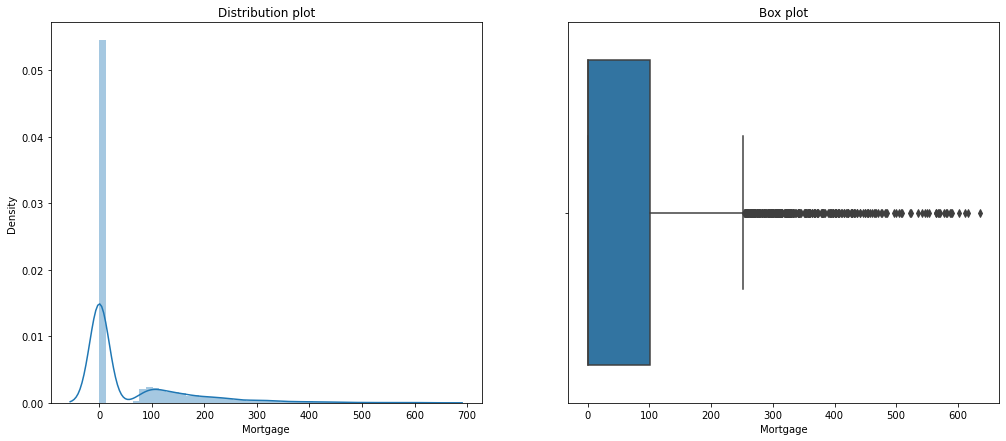

 Total Number of outliers in Mortgage: 291


In [479]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'Mortgage', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['Mortgage'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['Mortgage'],25),np.percentile(df['Mortgage'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['Mortgage'] if i < lower or i > upper]
print('{} Total Number of outliers in Mortgage: {}'.format('\033[1m',len(Outliers)))

#### Most of cases we have zero as value this tell most of the cutomer doest have mortage.

#### we can see there is no proper distribution.

#### Distribution of categorical variables
#### HiddenScore

C:\Users\enaysep\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


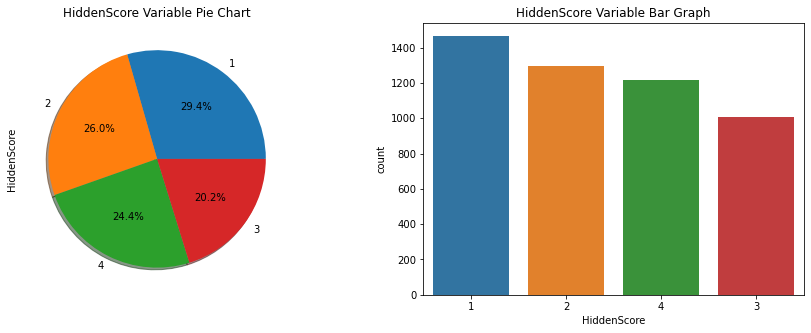

In [490]:
f,axes=plt.subplots(1,2,figsize=(15,5))
df['HiddenScore'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('HiddenScore',data=df,ax=axes[1],order=[1,2,4,3])
axes[0].set_title('HiddenScore Variable Pie Chart')
axes[1].set_title('HiddenScore Variable Bar Graph')
plt.show()

#### We can see nearly equal distribution of each category

#### Level

C:\Users\enaysep\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


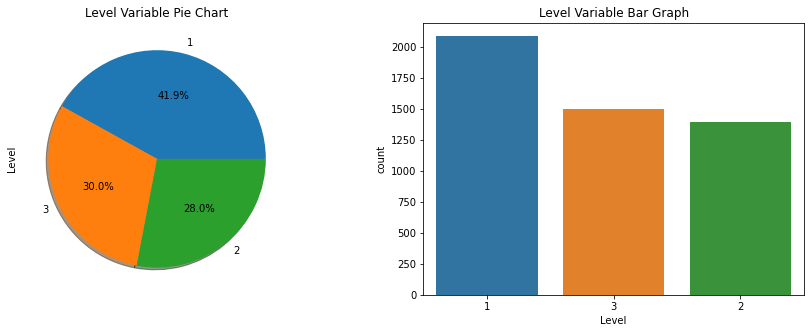

In [489]:
f,axes=plt.subplots(1,2,figsize=(15,5))
df['Level'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('Level',data=df,ax=axes[1],order=[1,3,2])
axes[0].set_title('Level Variable Pie Chart')
axes[1].set_title('Level Variable Bar Graph')
plt.show()

#### Level 2 and 3 has nearly equal distribution

#### Level 1 customers are more compared to others

#### FixedDepositAccount

C:\Users\enaysep\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


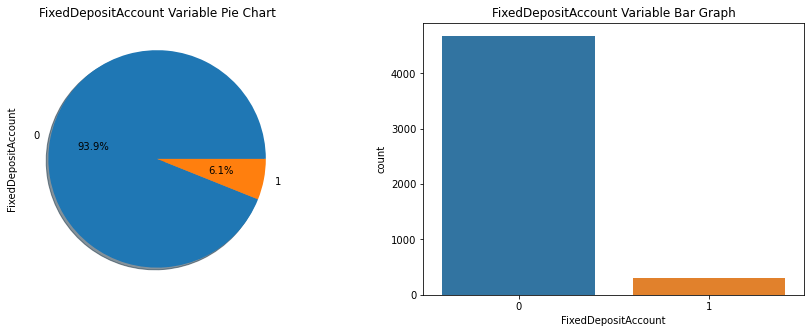

In [488]:
f,axes=plt.subplots(1,2,figsize=(15,5))
df['FixedDepositAccount'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('FixedDepositAccount',data=df,ax=axes[1])
axes[0].set_title('FixedDepositAccount Variable Pie Chart')
axes[1].set_title('FixedDepositAccount Variable Bar Graph')
plt.show()

#### We can see 93.9% of customers does not have fixed deposit account

#### InternetBanking

C:\Users\enaysep\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


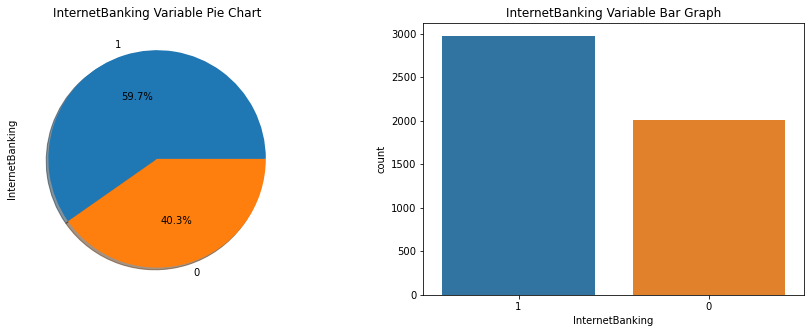

In [491]:
f,axes=plt.subplots(1,2,figsize=(15,5))
df['InternetBanking'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('InternetBanking',data=df,ax=axes[1],order=[1,0])
axes[0].set_title('InternetBanking Variable Pie Chart')
axes[1].set_title('InternetBanking Variable Bar Graph')
plt.show()

#### 60 % of people uses internet banking

#### CreditCard

C:\Users\enaysep\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


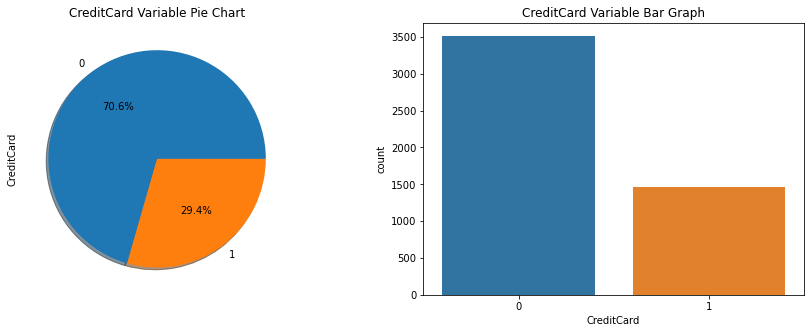

In [492]:
f,axes=plt.subplots(1,2,figsize=(15,5))
df['CreditCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('CreditCard',data=df,ax=axes[1],order=[0,1])
axes[0].set_title('CreditCard Variable Pie Chart')
axes[1].set_title('CreditCard Variable Bar Graph')
plt.show()

#### 70 % of people uses bank's credit card

#### LoanOnCard

C:\Users\enaysep\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


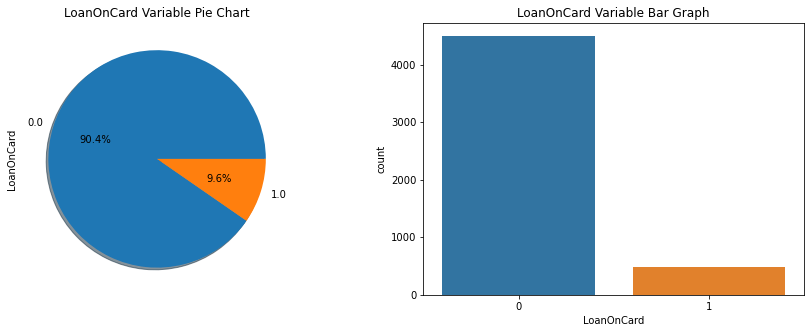

In [493]:
f,axes=plt.subplots(1,2,figsize=(15,5))
df['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('LoanOnCard',data=df,ax=axes[1],order=[0,1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

#### 90% of people does not have loan on credit card

## 3.2 Bi Variate Analysis

In [494]:
df.dtypes

Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                   int64
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
dtype: object

#### Numerical vs Category
#### CustomerSince vs LoanOnCard

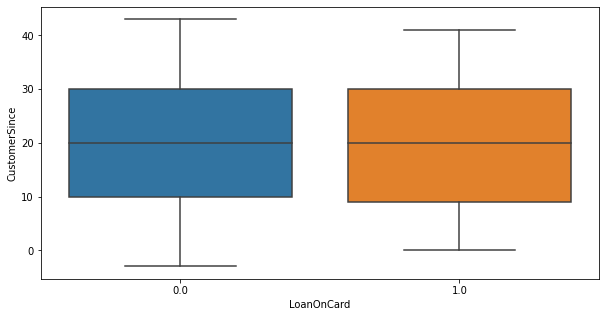

In [497]:
plt.figure(figsize=(10,5))
sns.boxplot(x='LoanOnCard', y='CustomerSince', data= df)
plt.show()

#### Customer of the bank since has equal distribution on loan holders and non-loan holders.

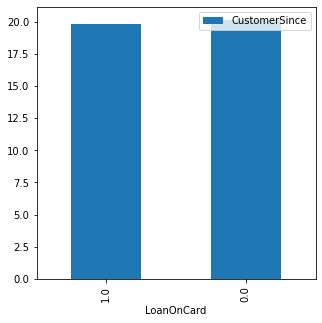

In [499]:
df.groupby(by=['LoanOnCard'])['CustomerSince'].mean().reset_index().sort_values(['CustomerSince']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='CustomerSince',
                                                                                                           kind='bar',
                                                                                                           figsize=(5,5))
plt.show()

#### Mean values are nearly equal for both loan holders and non loan holders

#### HighestSpend vs LoanOnCard

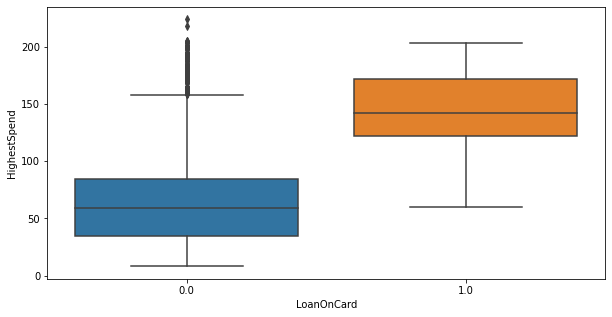

In [505]:
plt.figure(figsize=(10,5))
sns.boxplot(x='LoanOnCard', y='HighestSpend', data= df)
plt.show()

#### It is evident that people having loan on card spends more than who doesn't have

#### Some customer who does not have loan also spends more sometimes.

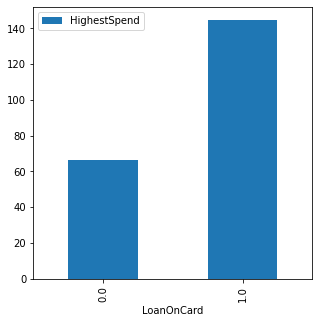

In [508]:
df.groupby(by=['LoanOnCard'])['HighestSpend'].mean().reset_index().sort_values(['HighestSpend']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='HighestSpend',
                                                                                                           kind='bar',
                                                                                                           figsize=(5,5))

plt.show()

#### Mean value of highest spend is more for loan holders

#### MonthlyAverageSpend vs LoanOnCard

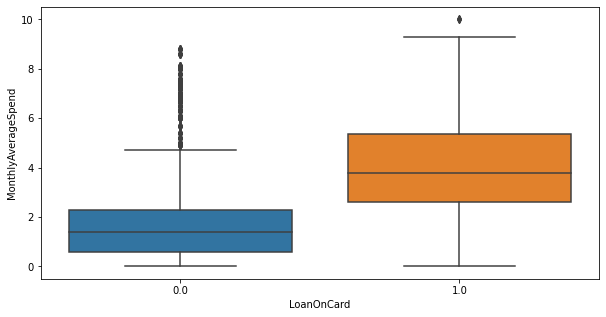

In [509]:
plt.figure(figsize=(10,5))
sns.boxplot(x='LoanOnCard', y='MonthlyAverageSpend', data= df)
plt.show()

#### Monthly average spend is more for loan holders

#### This column is directly proportional to highest spend

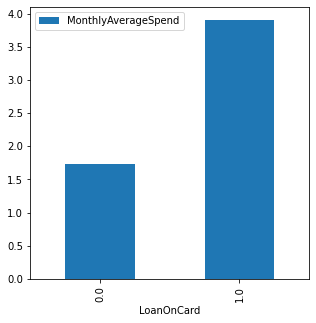

In [510]:
df.groupby(by=['LoanOnCard'])['MonthlyAverageSpend'].mean().reset_index().sort_values(['MonthlyAverageSpend']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='MonthlyAverageSpend',
                                                                                                           kind='bar',
                                                                                                           figsize=(5,5))

plt.show()

#### Average spend mean values are more for loan holders.

#### Mortgage vs LoanOnCard

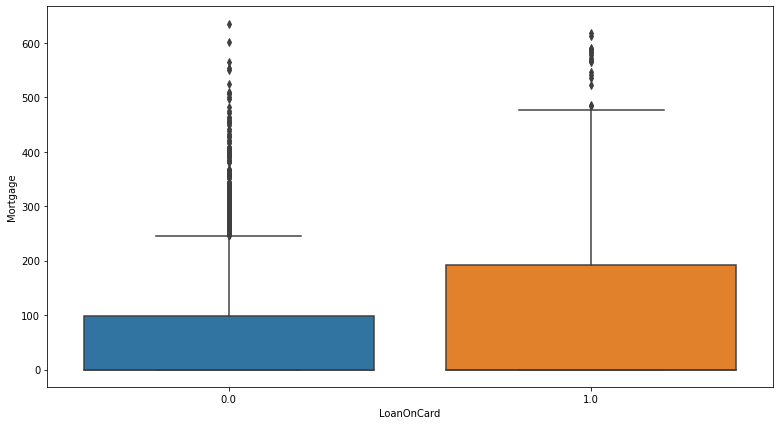

In [516]:
plt.figure(figsize=(13,7))
sns.boxplot(x='LoanOnCard', y='Mortgage', data= df)
plt.show()

#### Mortage value is high for loan holders

#### We can see extreme value in both the cases

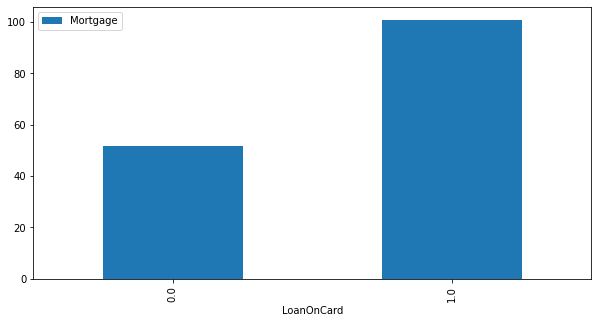

In [520]:
df.groupby(by=['LoanOnCard'])['Mortgage'].mean().reset_index().sort_values(['Mortgage']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='Mortgage',
                                                                                                           kind='bar',
                                                                                                           figsize=(10,5))

plt.show()

#### Mortgage Mean values are more for loan holders

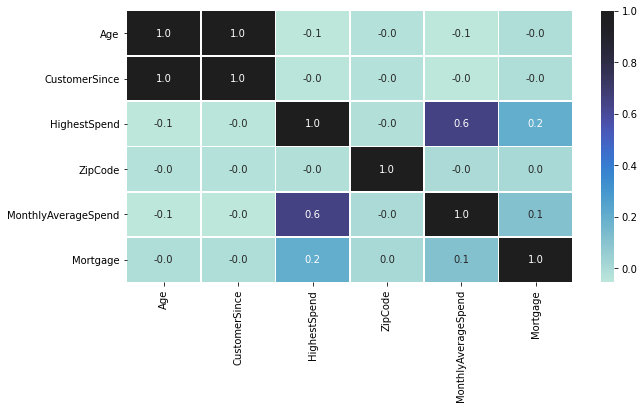

In [522]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

#### Age and customer since has correlation as 1. Any one can be used for the model.

#### Highest spend has large correlation with monthly average spend

#### Mortage and highest spend has little correlation

#### Rest of the variables does not have any relation

In [521]:
rs = np.random.RandomState(0)
file = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
Age,1.000000,0.994208,-0.054951,-0.029939,-0.051896,-0.013272
CustomerSince,0.994208,1.000000,-0.046092,-0.029415,-0.049918,-0.011380
HighestSpend,-0.054951,-0.046092,1.000000,-0.016447,0.646109,0.207236
ZipCode,-0.029939,-0.029415,-0.016447,1.000000,-0.004339,0.007214
MonthlyAverageSpend,-0.051896,-0.049918,0.646109,-0.004339,1.000000,0.110275
Mortgage,-0.013272,-0.011380,0.207236,0.007214,0.110275,1.000000


#### Age is most corelated to CustomerSince

## 3.3 MultiVariate Analysis

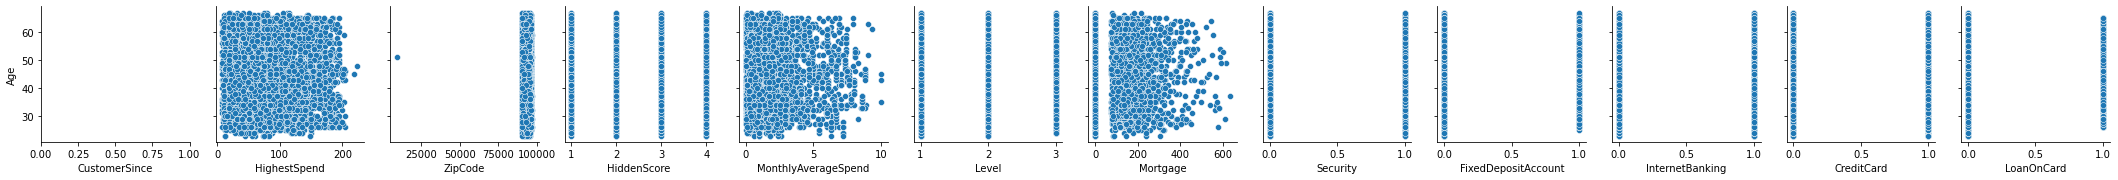

In [539]:
sns.pairplot(df, y_vars='Age', x_vars=['CustomerSince','HighestSpend', 'ZipCode','HiddenScore','MonthlyAverageSpend','Level','Mortgage','Security','FixedDepositAccount','InternetBanking','CreditCard','LoanOnCard'
                                                        ])
plt.show()

#### "Monthly average spend" vs "loan" vs "level"

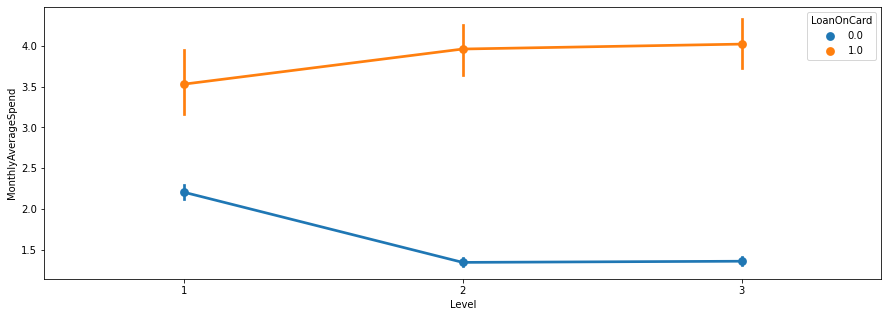

In [540]:
plt.figure(figsize=(15,5))
sns.pointplot(x="Level", y="MonthlyAverageSpend", hue = 'LoanOnCard',  data=df)
plt.show()

#### We can clearly see that loan holder spend more money.Particulary the spend is more on level 2 and 3

In [542]:
# We can statistically check whether all the independent variables has significant effect on target variables
class_summary=df.groupby('LoanOnCard') #getting mean values of each class for all independent variables
class_summary.mean().reset_index()

,LoanOnCard,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
0,0.0,45.383111,20.146889,66.290444,93152.337111,1.729849,51.869111
1,1.0,45.066667,19.843750,144.745833,93153.202083,3.905354,100.845833


# 4. Data pre-processing:

In [544]:
# Outlier Analysis
# We are imputing outiers with mean
col=['HighestSpend','MonthlyAverageSpend','Mortgage']

In [545]:
for c in col:
    #getting upper lower quartile values
    q25,q75=np.percentile(df[c],25),np.percentile(df[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')
    #taking mean of a column without considering outliers
    df_include = df.loc[(df[c] >= lower) & (df[c] <= upper)]
    mean=int(df_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    print('\n')
    #imputing outliers with mean
    df[c]=np.where(df[c]>upper,mean,df[c])
    df[c]=np.where(df[c]<lower,mean,df[c])
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
    print('\n')

 Total Number of outliers in HighestSpend Before Imputing : 96


 Mean of HighestSpend is 71


 Total Number of outliers in HighestSpend After Imputing : 0


 Total Number of outliers in MonthlyAverageSpend Before Imputing : 324


 Mean of MonthlyAverageSpend is 1


 Total Number of outliers in MonthlyAverageSpend After Imputing : 0


 Total Number of outliers in Mortgage Before Imputing : 291


 Mean of Mortgage is 38


 Total Number of outliers in Mortgage After Imputing : 0




#### We have imputed all outliers with mean value

#### Age,Customer since and zip code does not have effect on target variable. So dropping this column before building model

In [558]:
df.drop(['Age','CustomerSince','ZipCode'],axis=1,inplace=True)

#### Credit card,internet banking and security does not have significant difference in target variable.So dropping this column before building model

In [569]:
df.drop(['CreditCard','InternetBanking','Security'],axis=1,inplace=True)

In [570]:
df.dtypes

HighestSpend              int64
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
FixedDepositAccount    category
LoanOnCard             category
dtype: object

C:\Users\enaysep\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


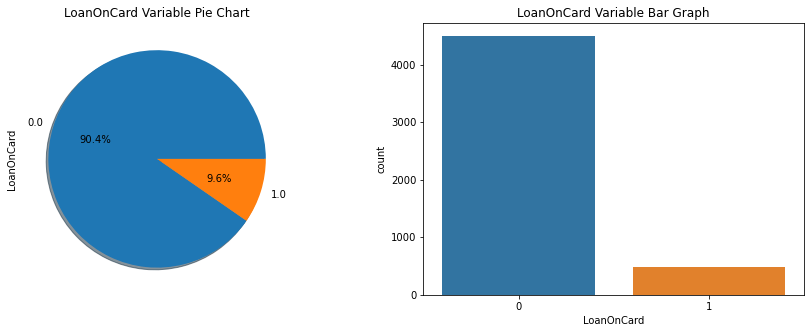

In [571]:
# Checking on Target Imbalance
f,axes=plt.subplots(1,2,figsize=(15,5))
df['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('LoanOnCard',data=df,ax=axes[1],order=[0,1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

### Segregate predictors vs target attributes

In [572]:
# Arrange data into independent variables and dependent variables
X=df.drop(columns='LoanOnCard')
y=df['LoanOnCard'] #target

### Splitting Data into Training and Test

In [573]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# 5. Model training, testing and tuning:

### Logistic Regression Model

In [574]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

print('Accuracy on Training data:',logreg.score(X_train, y_train) )
print('Accuracy on Test data:',logreg.score(X_test, y_test) )

Accuracy on Training data: 0.9506597819850832
Accuracy on Test data: 0.9424364123159303


C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 95% accuracy on training set and 94% accuracy on test set.

#### Here training set accuracy and testing accuracy are balanced when model is built without sampling also accuracy is good

### Confusion Matrix

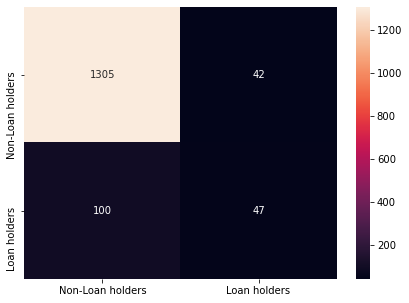

In [575]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

#### In the above figure 100 and 42 are the errors in the model.

#### we are getting very less error

In [577]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      1347
         1.0       0.53      0.32      0.40       147

    accuracy                           0.90      1494
   macro avg       0.73      0.64      0.67      1494
weighted avg       0.89      0.90      0.89      1494



### Naive Bayes Model

In [580]:
g_model = GaussianNB()
g_model.fit(X_train, y_train.ravel())
g_pred = g_model.predict(X_test)

print('Accuracy on Training data:',g_model.score(X_train, y_train) )
print('Accuracy on Test data:',g_model.score(X_test, y_test) )

Accuracy on Training data: 0.9104991394148021
Accuracy on Test data: 0.9022757697456493


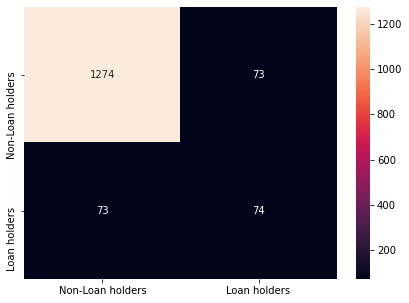

In [581]:
cm = confusion_matrix(y_test, g_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [582]:
print("classification  Matrix:\n",classification_report(y_test,g_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1347
         1.0       0.50      0.50      0.50       147

    accuracy                           0.90      1494
   macro avg       0.72      0.72      0.72      1494
weighted avg       0.90      0.90      0.90      1494



### K-Fold CV for finding best model

In [583]:
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=13)
GN_model=GaussianNB()

C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\enaysep\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

LR: 0.946787 (0.007254)
KNN: 0.925100 (0.006901)
NB: 0.907430 (0.013750)


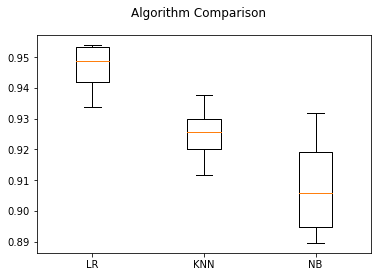

In [587]:
#seed = 7
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 6. Conclusion and improvisation:

#### We are selecting final model as logistic regression as it performs well in training and testing test.

#### Logistic Regression is not affected by overfitting and it is also has good recall value.

#### Logistic regression performed well in k-fold cross validation as well.

#### ----------------------------------------------------------------------------------------------------------------------------